   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.3 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 156ms/step - accuracy: 0.0968 - loss: 3.0331 - val_accuracy: 0.0967 - val_loss: 2.3707
Epoch 2/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.1053 - loss: 2.3028 - val_accuracy: 0.1083 - val_loss: 3.1882
Epoch 3/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - accuracy: 0.1077 - loss: 2.3022 - val_accuracy: 0.1000 - val_loss: 3.8973
Epoch 4/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.1109 - loss: 2.3021 - val_accuracy: 0.1033 - val_loss: 4.5313
Epoch 5/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.1024 - loss: 2.3020 - val_accuracy: 0.0983 - val_loss: 4.7029
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0891 - loss: 4.7356
Test Accuracy: 0.0890
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


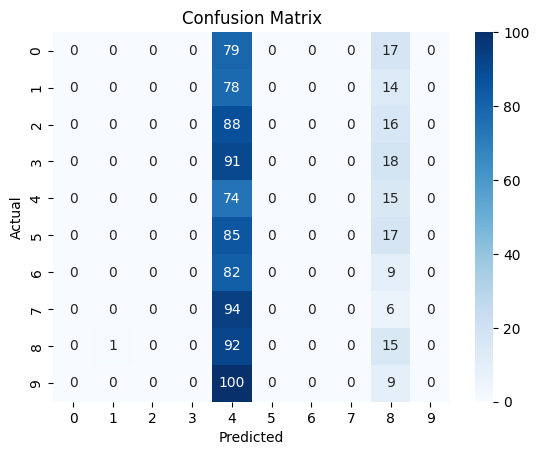

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://788bf23ad2b997ea51.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [1]:
# Install necessary library
%pip install --upgrade gradio

# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix
import gradio as gr

# 1. Generate synthetic dataset
num_classes = 10
num_train = 6000
num_test = 1000

x_train = np.random.rand(num_train, 28, 28, 1).astype('float32')
x_test = np.random.rand(num_test, 28, 28, 1).astype('float32')
y_train = np.random.randint(0, num_classes, num_train)
y_test = np.random.randint(0, num_classes, num_test)
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# 2. Build model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Train model
model.fit(x_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)

# 4. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

# 5. Confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 6. Gradio interface (basic image upload + prediction)
def predict_digit(image):
    import cv2
    image = cv2.resize(image, (28, 28))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = 255 - image
    image = image / 255.0
    image = image.reshape(1, 28, 28, 1)
    prediction = model.predict(image).argmax()
    return f"Predicted Digit: {prediction}"

gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(type="numpy", image_mode="RGB"),
    outputs="text",
    title="Digit Recognition",
    description="Upload or draw a digit image (0-9)."
).launch()